In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/AI4E_ML01'

/content/drive/MyDrive/AI4E_ML01


In [ ]:
!ls

HW_W7_Randomforest_Thao.ipynb  sample.csv
linear.csv		       WA_Fn-UseC_-Telco-Customer-Churn.csv
nonLinear.csv		       weather_forecast.csv


In [1]:
# Load libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', engine='c')
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

# **EDA**

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Encoding, changing catergorical to numeric data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy(deep = True)
text_data_features = [i for i in df.columns if i not in df.describe().columns]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
customerID  :  [5375 3962 2564 ... 3367 5934 2226]  =  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mail

# **Modelling**

In [ ]:
df1.head(10)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   
5        6551       0              0        0           0       8   
6        1002       1              0        0           1      22   
7        4770       0              0        0           0      10   
8        5604       0              0        1           0      28   
9        4534       1              0        0           1      62   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   
5             1              2                1               0  ...   
6             1              2                1               0  ...   
7             0              1                0               2  ...   
8             1              2                1               0  ...   
9             1              0                0               2  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   
5                 2            0            2                2         0   
6                 0            0            2                0         0   
7                 0            0            0                0         0   
8                 2            2            2                2         0   
9                 0            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1  
5                 1              2           99.65          6104      1  
6                 1              1           89.10          1550      0  
7                 0              3           29.75          2609      0  
8                 1              2          104.80          2646      1  
9                 0              0           56.15          3022      0  

[10 rows x 21 columns]

In [ ]:
df=df1.drop(columns =['customerID'],axis = 1)

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)
num_folds = 10
scoring = 'accuracy'

# Fit với SVM, Decision Tree, Random Forest và đưa ra dự đoán

In [ ]:
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


CART: 0.725235 (0.014166)
SVM: 0.737127 (0.014621)
RF: 0.786303 (0.011488)


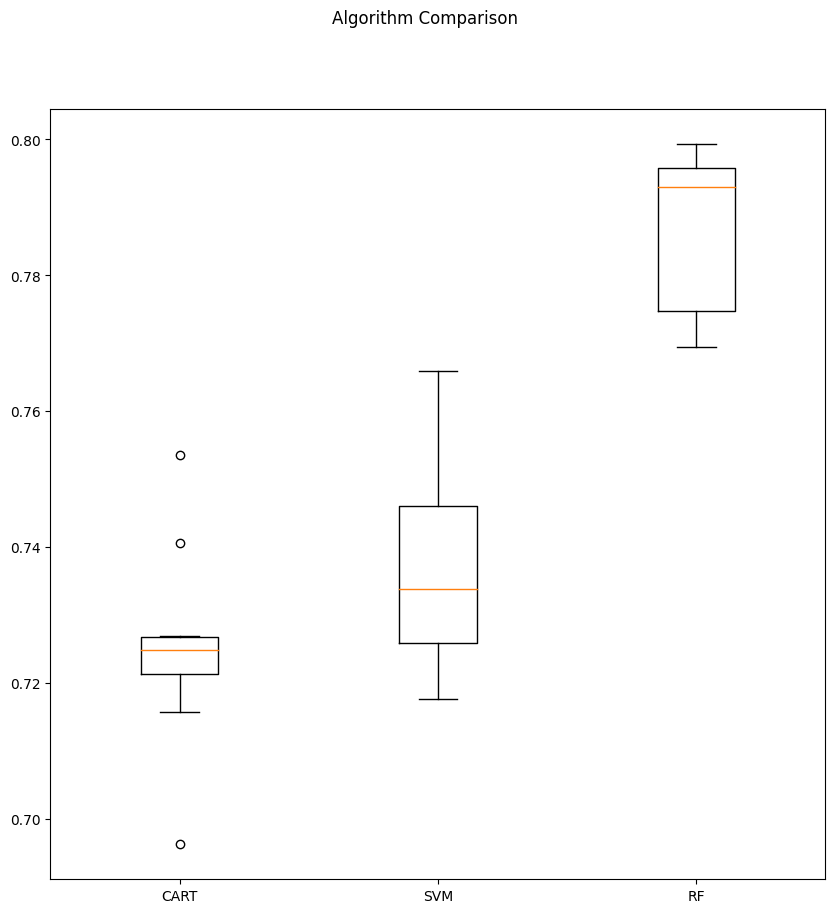

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **Model Tuning với GridsearchCV**

In [ ]:
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',  RandomForestClassifier())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledCART: 0.725766 (0.018038)
ScaledSVM: 0.791807 (0.014328)
ScaledRF: 0.789320 (0.011237)


**Gridseach CV với RandomForestClassifier**

In [ ]:
param_grid  = { 
                'n_estimators' : [500,1200],
               # 'min_samples_split': [2,5,10,15,100],
               # 'min_samples_leaf': [1,2,5,10],
                'max_depth': range(1,5,2),
                'max_features' : ('log2', 'sqrt'),
                'class_weight':[{1: w} for w in [1,1.5]]}

GridRF = GridSearchCV(RandomForestClassifier(random_state=seed), param_grid)
GridRF.fit(X_train, y_train)
print("\nBest parameters \n" + str(GridRF.best_params_))


Best parameters 
{'class_weight': {1: 1.5}, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 1200}


In [ ]:
clf = RandomForestClassifier(random_state=7,**GridRF.best_params_)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={1: 1.5}, max_depth=3, max_features='log2',
                       n_estimators=1200, random_state=7)

In [ ]:
clf_score = cross_val_score(clf, X_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.77836879 0.77659574 0.78546099 0.76950355 0.79928952 0.80461812
 0.81527531 0.79040853 0.78863233 0.79040853]


0.7898561404834789

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred))

[[3562  591]
 [ 582  899]]


In [ ]:
print(classification_report( y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4153
           1       0.60      0.61      0.61      1481

    accuracy                           0.79      5634
   macro avg       0.73      0.73      0.73      5634
weighted avg       0.79      0.79      0.79      5634



**Feature Importance**

In [ ]:
clf_fea = pd.DataFrame(clf.feature_importances_)
clf_fea["Feature"] = list(X_train) 
clf1=clf_fea.sort_values(by=0, ascending=False)
clf1.head()

0          Feature
14  0.293800         Contract
8   0.168980   OnlineSecurity
4   0.154037           tenure
11  0.126694      TechSupport
7   0.054760  InternetService

**Gridseach CV với DecisionTreeClassifier**

In [ ]:
param_grid={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=seed), param_grid,cv=10)
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1620 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [ ]:
print("\nBest parameters \n" + str(grid.best_params_))


Best parameters 
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [ ]:
dtree = DecisionTreeClassifier(random_state=seed,criterion= 'entropy', max_depth= 6, min_samples_leaf= 9, min_samples_split= 2)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_train)
dtree.score(X_train, y_train)


0.8068867589634363

In [ ]:
print(classification_report( y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      4153
           1       0.69      0.48      0.57      1481

    accuracy                           0.81      5634
   macro avg       0.76      0.70      0.72      5634
weighted avg       0.80      0.81      0.79      5634



**Feature Importance**

In [ ]:
dtree_fea = pd.DataFrame(dtree.feature_importances_)
dtree_fea["Feature"] = list(X_train) 
dtree1=dtree_fea.sort_values(by=0, ascending=False)
dtree1.head()

0          Feature
14  0.497277         Contract
4   0.137104           tenure
8   0.131273   OnlineSecurity
17  0.091795   MonthlyCharges
7   0.060613  InternetService

In [ ]:
from sklearn import tree
tree.plot_tree(dtree)

[Text(0.5102370689655172, 0.9285714285714286, 'x[14] <= 0.5\nentropy = 0.831\nsamples = 5634\nvalue = [4153, 1481]'),
 Text(0.2683189655172414, 0.7857142857142857, 'x[8] <= 0.5\nentropy = 0.983\nsamples = 3106\nvalue = [1792, 1314]'),
 Text(0.13793103448275862, 0.6428571428571429, 'x[4] <= 5.5\nentropy = 1.0\nsamples = 2104\nvalue = [1039, 1065]'),
 Text(0.06896551724137931, 0.5, 'x[7] <= 0.5\nentropy = 0.912\nsamples = 712\nvalue = [233, 479]'),
 Text(0.034482758620689655, 0.35714285714285715, 'x[17] <= 55.225\nentropy = 0.995\nsamples = 304\nvalue = [140, 164]'),
 Text(0.017241379310344827, 0.21428571428571427, 'x[10] <= 1.0\nentropy = 0.983\nsamples = 260\nvalue = [110, 150]'),
 Text(0.008620689655172414, 0.07142857142857142, 'entropy = 0.99\nsamples = 238\nvalue = [105, 133]'),
 Text(0.02586206896551724, 0.07142857142857142, 'entropy = 0.773\nsamples = 22\nvalue = [5, 17]'),
 Text(0.05172413793103448, 0.21428571428571427, 'x[17] <= 56.025\nentropy = 0.902\nsamples = 44\nvalue = [30

# **Conclusion**
Before:  
Decision tree: 0.724882 (0.017756)

SVM: 0.737127 (0.014621)

RF: 0.788787 (0.011615)

 
After tuning:
Decision tree: 0.8059630856601988

RF: [0.77836879 0.77659574 0.78546099 0.76950355 0.79928952 0.80461812
 0.81527531 0.79040853 0.78863233 0.79040853]

RFMean =0.7898561404834789
